In [1]:
from tensorflow.python.keras import backend as k

In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import pandas as pd

In [26]:
X=pd.read_csv('./Dataset/fashion-mnist.csv')
print(X.shape)
X=X.values

(10000, 785)


In [27]:
x=X[:,1:]
y=X[:,0]

In [28]:
print(x.shape,y.shape)

(10000, 784) (10000,)


In [29]:
print(np.unique(y,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


In [30]:
import matplotlib.pyplot as plt

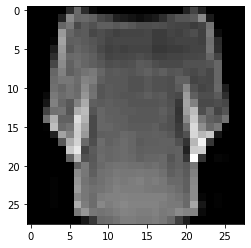

In [31]:
plt.imshow(x[5].reshape(28,28),cmap="gray")
plt.show()

In [32]:
x=x.reshape((-1,28,28,1))/255            #Reshape and normalized
print (x[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.03529412]
  [0.03137255]
  [0.        ]
  [0.        ]
  [0.13333333]
  [0.11372549]
  [0.02745098]
  [0.        ]
  [0.04313725]
  [0.09411765]
  [0.        ]
  [0.        ]
  [0.01176471]
  [0.01176471]
  [0.00392157]
  [0.        ]
  [0.00392157]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.01568627]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.17254902]
  [0.34509804]
  [0.38823529]
  [0.47843137]
  [0.48235294]
  [0.31372549]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00392157]
  [0.00392157]
  [0.00392157]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.00392157]
  [0.00784314]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.01176471]
  [0.18039216]
  [0.68235294]
  [0.9

In [33]:
print(x.shape,y.shape)

(10000, 28, 28, 1) (10000,)


## One - hot notation is reqd

In [34]:
from keras.utils import to_categorical

In [35]:
y=to_categorical(y,num_classes=10)

In [36]:
print(y[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [37]:
print(x.shape,y.shape)

(10000, 28, 28, 1) (10000, 10)


# CNN Model

In [38]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu')) #5X5
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(20,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 20)          23060     
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)               

In [39]:
model.fit(x,y,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

W0721 15:35:47.072170  9172 deprecation.py:323] From c:\users\arnav\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 20s 2ms/sample - loss: 1.3253 - accuracy: 0.5544 - val_loss: 0.8033 - val_accuracy: 0.7020
Epoch 2/20
8000/8000 [==============================] - 16s 2ms/sample - loss: 0.7191 - accuracy: 0.7360 - val_loss: 0.6241 - val_accuracy: 0.7650
Epoch 3/20
8000/8000 [==============================] - 17s 2ms/sample - loss: 0.5911 - accuracy: 0.7753 - val_loss: 0.5688 - val_accuracy: 0.7980
Epoch 4/20
8000/8000 [==============================] - 16s 2ms/sample - loss: 0.5329 - accuracy: 0.7990 - val_loss: 0.5593 - val_accuracy: 0.7895
Epoch 5/20
8000/8000 [==============================] - 21s 3ms/sample - loss: 0.4967 - accuracy: 0.8179 - val_loss: 0.4682 - val_accuracy: 0.8320
Epoch 6/20
8000/8000 [==============================] - 17s 2ms/sample - loss: 0.4474 - accuracy: 0.8389 - val_loss: 0.4937 - val_accuracy: 0.8180
Epoch 7/20
8000/8000 [==============================] - 16s 2ms/sample

In [19]:
from tensorflow.python.framework import ops
ops.reset_default_graph()